In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\bhavi\Downloads\SMSR\Machine Learning\Loan_amount_prediction\loan_amount_data\train.csv")

In [3]:
df.head(20)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,C-17688,Polly Crumpler,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,...,684.12,1,Inactive,491,1234.92,2,Rural,1,43146.82,22382.57
6,C-23855,Nathalie Olivier,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,...,637.29,0,Unpossessed,227,2361.56,1,Semi-Urban,1,221050.80,0.00
7,C-11006,Clarinda Montana,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,...,812.26,0,Active,314,NaN,2,Urban,1,401040.70,168218.24
8,C-26934,Kenny Ankrom,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,...,705.29,1,Active,241,1296.07,4,Rural,1,54903.44,22842.29
9,C-24944,Barbie Goetsch,M,18,1546.17,Low,Working,Laborers,Rural,42091.29,...,613.24,0,Unpossessed,883,1546.17,2,Urban,1,67993.43,0.00


In [4]:
df.shape

(30000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [6]:
df.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [7]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [8]:
df.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [9]:
df.tail(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87
29999,C-33003,Bridget Garibaldi,F,63,3068.24,High,Pensioner,NaN,Rural,156290.54,...,815.44,0,Active,344,3068.24,3,Rural,1,194512.60,117217.90


In [10]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [11]:
df.rename(columns = {'Customer ID' : 'Customer_ID',
                     'Income (USD)' : 'Income_(USD)', 
                     'Income Stability' : 'Income_Stability', 
                     'Type of Employment' : 'Type_of_Employment', 
                     'Loan Amount Request (USD)' : 'Loan_Amount_Request', 
                     'Expense Type 1' : 'Expense_Type_1',
                     'Expense Type 2' : 'Expense_Type_2',
                     'Credit Score' : 'Credit_Score',
                     'No. of Defaults' : 'No_of_Defaults',
                     'Has Active Credit Card' : 'Has_Active_Credit_Card',
                     'Property ID' : 'Property_ID',
                     'Property Age' : 'Property_Age',
                     'Property Type' : 'Property_Type',
                     'Property Location' : 'Property_Location',
                     'Property Price' : 'Property_Price', 
                     'Loan Sanction Amount (USD)' : 'Loan_Sanction_Amount',
                     'Current Loan Expenses (USD)' : 'Current_Loan_Expenses'}, inplace = True)

In [12]:
df.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'Income_(USD)',
       'Income_Stability', 'Profession', 'Type_of_Employment', 'Location',
       'Loan_Amount_Request', 'Current_Loan_Expenses', 'Expense_Type_1',
       'Expense_Type_2', 'Dependents', 'Credit_Score', 'No_of_Defaults',
       'Has_Active_Credit_Card', 'Property_ID', 'Property_Age',
       'Property_Type', 'Property_Location', 'Co-Applicant', 'Property_Price',
       'Loan_Sanction_Amount'],
      dtype='object')

In [13]:
df

,Customer_ID,Name,Gender,Age,Income_(USD),Income_Stability,Profession,Type_of_Employment,Location,Loan_Amount_Request,...,Credit_Score,No_of_Defaults,Has_Active_Credit_Card,Property_ID,Property_Age,Property_Type,Property_Location,Co-Applicant,Property_Price,Loan_Sanction_Amount
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [14]:
print(df.Gender.value_counts())
print(df.Income_Stability.value_counts())
print(df.Profession.value_counts())
print(df.Type_of_Employment.value_counts())
print(df.Location.value_counts())
print(df.Expense_Type_1.value_counts())
print(df.Expense_Type_2.value_counts())
print(df.Has_Active_Credit_Card.value_counts())
print(df.Property_Location.value_counts())

Gender
M    15053
F    14894
Name: count, dtype: int64
Income_Stability
Low     25751
High     2566
Name: count, dtype: int64
Profession
Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: count, dtype: int64
Type_of_Employment
Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: count, dtype: int64
Location
Sem

In [15]:
df.dropna(axis = 0, inplace = True)

In [16]:
df.isnull().sum()

Customer_ID               0
Name                      0
Gender                    0
Age                       0
Income_(USD)              0
Income_Stability          0
Profession                0
Type_of_Employment        0
Location                  0
Loan_Amount_Request       0
Current_Loan_Expenses     0
Expense_Type_1            0
Expense_Type_2            0
Dependents                0
Credit_Score              0
No_of_Defaults            0
Has_Active_Credit_Card    0
Property_ID               0
Property_Age              0
Property_Type             0
Property_Location         0
Co-Applicant              0
Property_Price            0
Loan_Sanction_Amount      0
dtype: int64

In [17]:
i = df[df.Loan_Sanction_Amount <= 0].index
df.drop(i, inplace = True)

In [18]:
df.drop(["Customer_ID", "Name", "Type_of_Employment", "Profession", "Location", "Current_Loan_Expenses", "Dependents", "Has_Active_Credit_Card", "Property_ID", "Property_Age", "Property_Type", "Property_Location", "Co-Applicant", "Expense_Type_1", "Expense_Type_2", "Income_Stability", "Property_Price","No_of_Defaults"], inplace = True, axis = 1)

In [19]:
df.head()

,Gender,Age,Income_(USD),Loan_Amount_Request,Credit_Score,Loan_Sanction_Amount
5,F,60,1234.92,34434.72,684.12,22382.57
8,F,38,1296.07,35141.99,705.29,22842.29
10,M,18,2416.86,25765.72,652.41,16747.72
14,M,61,1664.52,72448.95,781.51,54336.71
15,F,54,3716.54,116487.58,749.33,75716.93


In [20]:
encoder = LabelEncoder()

df["Gender"] = encoder.fit_transform(df["Gender"])

In [21]:
df.head(3)

,Gender,Age,Income_(USD),Loan_Amount_Request,Credit_Score,Loan_Sanction_Amount
5,0,60,1234.92,34434.72,684.12,22382.57
8,0,38,1296.07,35141.99,705.29,22842.29
10,1,18,2416.86,25765.72,652.41,16747.72


In [22]:
df.dtypes

Gender                    int32
Age                       int64
Income_(USD)            float64
Loan_Amount_Request     float64
Credit_Score            float64
Loan_Sanction_Amount    float64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, 5 to 29998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                9799 non-null   int32  
 1   Age                   9799 non-null   int64  
 2   Income_(USD)          9799 non-null   float64
 3   Loan_Amount_Request   9799 non-null   float64
 4   Credit_Score          9799 non-null   float64
 5   Loan_Sanction_Amount  9799 non-null   float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 497.6 KB


In [24]:
x = df.drop(["Loan_Sanction_Amount"], axis = 1)
y = df["Loan_Sanction_Amount"]

In [25]:
print(x)

       Gender  Age  Income_(USD)  Loan_Amount_Request  Credit_Score
5           0   60       1234.92             34434.72        684.12
8           0   38       1296.07             35141.99        705.29
10          1   18       2416.86             25765.72        652.41
14          1   61       1664.52             72448.95        781.51
15          0   54       3716.54            116487.58        749.33
...       ...  ...           ...                  ...           ...
29985       0   18       3593.59             37012.73        714.09
29986       1   32       8308.27             75696.52        784.91
29995       1   38       4969.41             76657.90        869.61
29996       1   20       1606.88             66595.14        729.41
29998       1   38       2417.71            142524.10        677.27

[9799 rows x 5 columns]


In [26]:
print(y)

5        22382.57
8        22842.29
10       16747.72
14       54336.71
15       75716.93
           ...   
29985    24058.27
29986    52987.56
29995    68992.11
29996    46616.60
29998    99766.87
Name: Loan_Sanction_Amount, Length: 9799, dtype: float64


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [28]:
print(x_train)

       Gender  Age  Income_(USD)  Loan_Amount_Request  Credit_Score
9817        0   20       3533.98            327666.66        654.94
2782        1   53       2552.52             45999.21        745.58
24354       0   34       1982.44            126177.87        706.20
11242       0   31       5483.43             46340.87        784.90
8622        0   18       3030.28             83876.64        829.66
...       ...  ...           ...                  ...           ...
14765       0   49        931.02             72680.84        824.27
2759        0   23       1583.26            123937.83        770.76
1562        0   44       3798.93            109253.15        670.45
13710       0   38       2456.90             42761.22        654.68
18100       0   54       1180.24             67673.52        681.28

[7839 rows x 5 columns]


In [29]:
print(y_train)

9817     212983.33
2782      32199.45
24354     88324.51
11242     34755.65
8622      62907.48
           ...    
14765     50876.59
2759      99150.26
1562      76477.20
13710     29932.85
18100     47371.46
Name: Loan_Sanction_Amount, Length: 7839, dtype: float64


In [30]:
lin_reg_model = LinearRegression()

In [31]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [32]:
train_model = lin_reg_model.predict(x_train)

In [33]:
lin_reg_model.score(x_train, y_train)*100

98.64444515446871

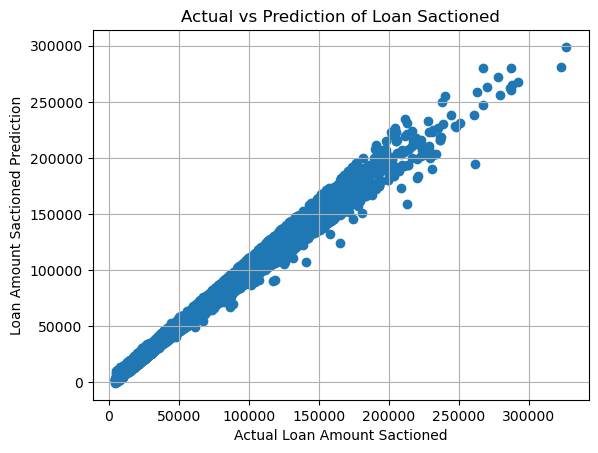

In [34]:
plt.scatter(y_train, train_model)
plt.xlabel("Actual Loan Amount Sactioned")
plt.ylabel("Loan Amount Sactioned Prediction")
plt.title("Actual vs Prediction of Loan Sactioned")
plt.grid()
plt.show()

In [35]:
test_model = lin_reg_model.predict(x_test)

In [36]:
lin_reg_model.score(x_test, y_test)*100

98.45614475354368

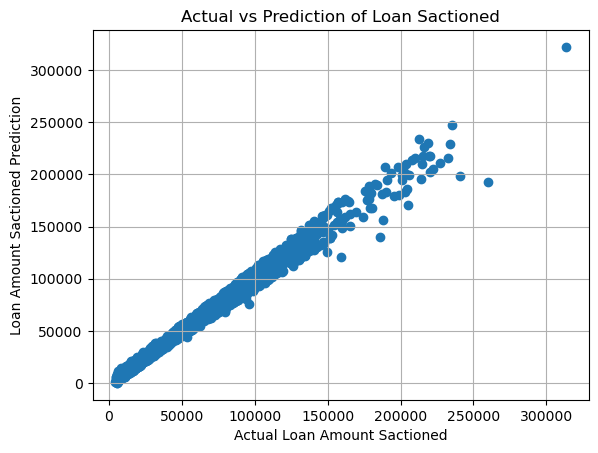

In [37]:
plt.scatter(y_test, test_model)
plt.xlabel("Actual Loan Amount Sactioned")
plt.ylabel("Loan Amount Sactioned Prediction")
plt.title("Actual vs Prediction of Loan Sactioned")
plt.grid()
plt.show()

In [38]:
saved_model = pickle.dumps(lin_reg_model)
LoanAmountPrediction_from_pickle = pickle.loads(saved_model)
LoanAmountPrediction_from_pickle.predict(x_test)

array([159906.22491133,  16916.29843338,  29401.7812601 , ...,
        77698.52292747,  31945.16035222,  72713.91060615])

In [39]:
pickle.dump(lin_reg_model, open("LoanAmountModel.pkl", "wb"))

In [40]:
model = pickle.load(open("LoanAmountModel.pkl", "rb"))

In [41]:
y_test.head(60)

20367    145820.73
26393     20111.42
12344     32237.22
44        27194.25
29817     16488.42
2065      75886.50
625       18518.64
22005     55995.21
29960     66718.35
9867      73203.47
15004    159017.81
4670     122871.01
11389     59279.81
26609     34688.33
27882     18282.38
26145     66519.77
20699     63566.41
4680      67478.43
8494     127666.87
11992     64548.15
3761      10179.87
18555     49236.67
27844     35948.03
6413     134164.72
21130     69911.24
15654    142920.54
19132     67785.26
14938     30924.74
3857     131245.74
19752    109859.24
18518     47498.28
1741      28697.71
16494     49066.76
13178    132743.02
17919     41970.00
12821    129788.93
11775     34747.19
17135    161665.10
4624      58298.29
1057     113112.52
27504     61112.56
7196      50216.34
17642     47596.14
2859      51813.03
15351     59056.77
7535      25198.74
21134     34255.68
18720     66637.33
7534      62601.46
16755     47535.98
2985       4488.02
24120    146615.50
6011      56

In [46]:
line = 23074

a = list(x_test.loc[line])
b = y_test.loc[line]

a1 = model.predict([a])

print("List of arguments:                               ",a)
print("Actual Amount:                                   ",b)

print("Model Prediction Amount:                         ",a1)

print("Difference Between Actual and Prediction:        ",a1 - b)

List of arguments:                                [1.0, 27.0, 1536.35, 25076.64, 664.54]
Actual Amount:                                    16299.82
Model Prediction Amount:                          [13146.22918032]
Difference Between Actual and Prediction:         [-3153.59081968]


C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
df.head(3)

,Gender,Age,Income_(USD),Loan_Amount_Request,Credit_Score,Loan_Sanction_Amount
5,0,60,1234.92,34434.72,684.12,22382.57
8,0,38,1296.07,35141.99,705.29,22842.29
10,1,18,2416.86,25765.72,652.41,16747.72


In [44]:
print(model.predict([[1, 43, 2361.56, 152561.34, 637.29]]))

[103878.33858265]


C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
